In [1]:
%env HF_ENDPOINT=https://hf-mirror.com
import os

# 设置 HF_HOME 环境变量 设置下载路径
os.environ['HF_HOME'] = '/home/data/ckw/hf-models/'

env: HF_ENDPOINT=https://hf-mirror.com


In [11]:
# import pandas as pd
# import os
# import json
# from PIL import Image
# import base64
# from io import BytesIO
# from datasets import load_dataset

# # Function to save images from base64 encoded strings
# def save_image(encoded_string, file_path):
#     img_data = base64.b64decode(encoded_string)
#     img = Image.open(BytesIO(img_data))
#     img.save(file_path)

# # Create a directory to save images
# img_dir = './img'
# if not os.path.exists(img_dir):
#     os.makedirs(img_dir)

# # Configs to process
# configs = ['en', 'zh']

# # Iterate over each config
# for config in configs:
#     print(f"Processing config: {config}")
#     dataset = load_dataset("BUAADreamer/llava-en-zh-300k", config)
    
#     # Iterate over each split
#     for split in dataset.keys():
#         print(f"Processing split: {split}")
#         df = pd.DataFrame(dataset[split])

#         # List to store the converted data
#         json_data = []

#         # Process each row in the DataFrame
#         for idx, row in df.iterrows():
#             # Save the image
#             img_filename = f'image_{config}_{split}_{idx}.png'
#             img_path = os.path.join(img_dir, img_filename)
#             save_image(row['image'], img_path)

#             # Create a dictionary for JSON format
#             data_dict = {
#                 "id": f"{config}_{split}_{idx}",
#                 "image": img_path,
#                 "conversations": json.loads(row['messages'])
#             }

#             json_data.append(data_dict)

#         # Save the list of dictionaries to a JSON file
#         json_filename = f'train_{config}_{split}.json'
#         with open(json_filename, 'w') as json_file:
#             json.dump(json_data, json_file, indent=4)

#         print(f"Finished processing split: {split} for config: {config}")

# print("All configs and splits processed!")


In [19]:
import pandas as pd
import os
import json
from PIL import Image
from datasets import load_dataset
from tqdm.auto import tqdm

# Function to save images
def save_image(image, file_path):
    image.save(file_path)

# Create a directory to save images
img_dir = './img'
if not os.path.exists(img_dir):
    os.makedirs(img_dir)

# Configs to process
configs = ['en', 'zh']

# Iterate over each config
for config in configs:
    print(f"Processing config: {config}")
    dataset = load_dataset("BUAADreamer/llava-en-zh-2k", config)
    
    # Iterate over each split
    for split in dataset.keys():
        print(f"Processing split: {split}")
        df = pd.DataFrame(dataset[split])

        # List to store the converted data
        json_data = []

        # Process each row in the DataFrame
        for idx, row in tqdm(df.iterrows(),total=len(df)):
            img_paths = []
            for img_idx, image in enumerate(row['images']):
                # Save each image
                img_filename = f'image_{config}_{split}_{idx}_{img_idx}.png'
                img_path = os.path.join(img_dir, img_filename)
                save_image(image, img_path)
                img_paths.append(img_path)
            
            # Create a dictionary for JSON format
            data_dict = {
                "id": f"{config}_{split}_{idx}",
                "images": img_paths,
                "conversations": row['messages']
            }

            json_data.append(data_dict)

        # Save the list of dictionaries to a JSON file
        json_filename = f'train_{config}_{split}.json'
        with open(json_filename, 'w') as json_file:
            json.dump(json_data, json_file, indent=4)

        print(f"Finished processing split: {split} for config: {config}")

print("All configs and splits processed!")


Processing config: en
Processing split: train


  0%|          | 0/1000 [00:00<?, ?it/s]

Finished processing split: train for config: en
Processing config: zh


Generating train split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Processing split: train


  0%|          | 0/1000 [00:00<?, ?it/s]

Finished processing split: train for config: zh
All configs and splits processed!


In [6]:
row

messages    [{'role': 'user', 'content': 'How many basebal...
images      [<PIL.JpegImagePlugin.JpegImageFile image mode...
Name: 0, dtype: object

In [15]:
row['messages']

[{'role': 'user',
  'content': 'How many baseball players are visible in the image?'},
 {'role': 'assistant',
  'content': 'There are three baseball players visible in the image.'},
 {'role': 'user', 'content': 'What are the players holding in their hands?'},
 {'role': 'assistant',
  'content': 'The players are holding baseball bats in their hands.'},
 {'role': 'user', 'content': 'Are the players in a dugout?'},
 {'role': 'assistant',
  'content': 'Yes, the three baseball players are standing in the dugout.'},
 {'role': 'user', 'content': 'Is the image in color or black and white?'},
 {'role': 'assistant',
  'content': 'The image is an old black and white photo of the three baseball players.'},
 {'role': 'user',
  'content': 'Do the players belong to a specific baseball team?'},
 {'role': 'assistant',
  'content': 'Yes, the players belong to the Boston Red Sox baseball team.'}]

In [17]:
row['images']

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x514>]

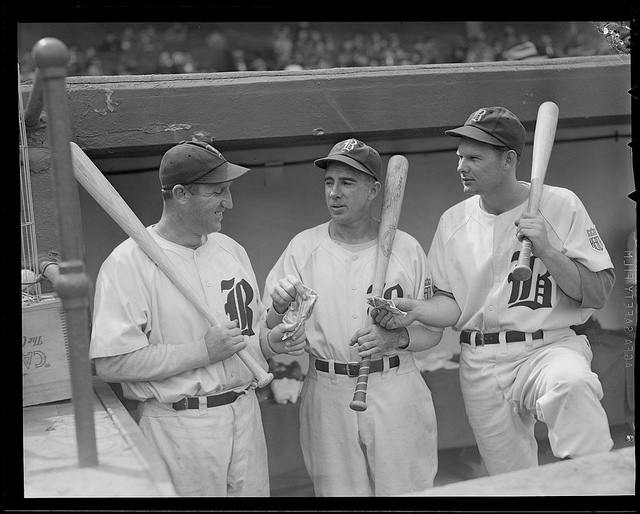

In [10]:
row['images'][0]

In [25]:
import json
import random

# 输入文件路径
input_file_path = './train_en_train.json'
# 输出文件路径
output_file_path = './sample_50_train.json'
output_file_path = './sample_10_test.json'

# 从文件中读取数据
with open(input_file_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

In [26]:
len(data)

1000

In [27]:
# 随机选取 100 项
sample_data = random.sample(data, 10)

# 将选取的 100 项写入新的文件
with open(output_file_path, 'w', encoding='utf-8') as f:
    json.dump(sample_data, f, ensure_ascii=False, indent=4)

print(f"随机选取的100项数据已保存到 {output_file_path}")

随机选取的100项数据已保存到 ./sample_10_test.json
